In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from modules import DtPre

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# def fillna(df) :
#     df["Age"].fillna(df["Age"].mean(), inplace=True)
#     df["Cabin"].fillna("N", inplace=True)
#     df["Embarked"].fillna("N", inplace=True)
#     df["Fare"].fillna(0, inplace=True)
#     return df

# def drop_features(df) :
#     df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)
#     return df

# def format_features(df) :
#     df["Cabin"] = df["Cabin"].str[:1] 
#     features = ["Cabin", "Sex", "Embarked"]
#     for feature in features :
#         le = LabelEncoder()
#         le = le.fit(df[feature])
#         df[feature] = le.transform(df[feature])
#     return df
    
# def transform_features(df) :
#     df = fillna(df)
#     df = drop_features(df)
#     df = format_features(df)
#     return df

In [4]:
titanic_df = pd.read_csv("./dataset/train.csv")
y_titanic_df = titanic_df["Survived"]   # 레이블 데이터 셋 추출
X_titanic_df = titanic_df.drop("Survived", axis=1)  # 피쳐 데이터 셋에서 레이블셋은 삭제

X_titanic_df = DtPre.transform_features(X_titanic_df) # 만들어둔 전처리 함수 적용

In [5]:
titanic_clf = DecisionTreeClassifier(random_state=121)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=121)

titanic_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=121)

Feature Importance : [0.074 0.32  0.224 0.049 0.033 0.223 0.056 0.022]
Pclass : 0.074
Sex : 0.320
Age : 0.224
SibSp : 0.049
Parch : 0.033
Fare : 0.223
Cabin : 0.056
Embarked : 0.022


<AxesSubplot:>

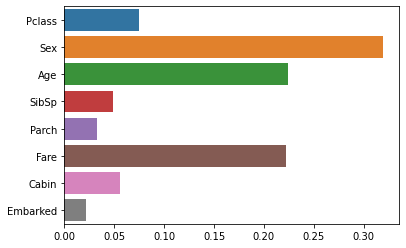

In [6]:
# feature importance 추출
print(f"Feature Importance : {np.round(titanic_clf.feature_importances_, 3)}")

# feature 별 importance 매핑
features = []
for name, value in zip(X_titanic_df.columns, titanic_clf.feature_importances_) :
    print(f"{name} : {value:.3f}")
    features.append({name : np.round(value, 3)})

# feature importance를 column별로 시각화 하기
sns.barplot(x=titanic_clf.feature_importances_, y=X_titanic_df.columns)

In [7]:
titanic_lr = LogisticRegression()

titanic_lr.fit(X_train, y_train)

pred_all = titanic_lr.predict(X_test)

print(np.round(accuracy_score(y_test, pred_all),3))

0.777


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
X_train_feat = X_train[["Pclass", "Sex", "Age", "Fare", "Cabin"]]
X_test_feat = X_test[["Pclass", "Sex", "Age", "Fare", "Cabin"]]

In [9]:
titanic_lr_feat = LogisticRegression()

titanic_lr_feat.fit(X_train_feat, y_train)

pred_feat = titanic_lr_feat.predict(X_test_feat)

print(np.round(accuracy_score(y_test, pred_feat),3))

0.782
